# 120 Years of Olympic History: Athletes and Results

## Problem Definition
The Olympic Games, held since 1896, provide one of the most comprehensive datasets for analyzing global trends in sports, gender participation, and national performance. Despite the long history of the Games, systematic analysis of gender dynamics, national specializations, and contextual factors such as hosting effects remains incomplete. Understanding these patterns is crucial not only for sports history but also for broader discussions on gender equality, cultural influence, and national strategies in sports.
This study aims to analyze Olympic data spanning from 1896 to 2016.

## Research Questions & Sub-Questions
This study is motivated by two central research axes:

1. **How has female participation in the Olympic Games evolved across time, sports, and countries?**
   - What percentage of athletes were female in each Olympic year?
   - Which sports introduced female categories earliest, and which were the last?
   - Which countries have sent the highest number of female athletes in Olympic history?

2. **How do countries perform in the Olympic Games in terms of overall success, specialization in sports, and the impact of hosting?**
    - Which countries have the highest total medal counts?
    - In which sports do the top medal-winning countries particularly excel?
    - Do host countries win more medals when hosting?

By addressing these research questions, the study aims to produce a holistic understanding of the Olympic Games as both a sporting competition and a socio-political phenomenon. The findings will contribute to discussions on gender equality, the evolution of international sports systems, and the role of mega-events in shaping national athletic success.

**Data Source**: [Kaggle - 120 years of Olympic history: athletes and results](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess

plt.style.use("seaborn-v0_8") #0.13.2
#sns.set_palette("pastel")

In [2]:
data = pd.read_csv("input/athlete_events.csv")
noc = pd.read_csv("input/noc_regions.csv", dtype={"NOC": str})
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
data.info

<bound method DataFrame.info of             ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0    80.0   
1            2                  A Lamusi   M  23.0   170.0    60.0   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0    89.0   
271112  135570                  Piotr ya   M  27.0   176.0    59.0   
271113  135570                  Piotr ya   M  27.0   176.0    59.0   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summe

In [4]:
data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

### Initial observations: 

* There are duplicate rows in the dataset.
* There are missing values in the height, weight and age columns. 
* The 'NaN' values in the medal column indicate that the athlete did not win a medal.

In [5]:
#Data Cleaning and Preprocessing
noc.loc[noc["NOC"] == "GBR", "region"] = "Great Britain"

In [6]:
data.duplicated().value_counts()
data[data.duplicated()].head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1252,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
4282,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4283,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4862,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN
4864,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN


In [7]:
data = data.drop_duplicates()

## Research Question 1: Gender distribution of athletes over time
### Subquestion 1.1: What percentage of athletes were female in each Olympic year?

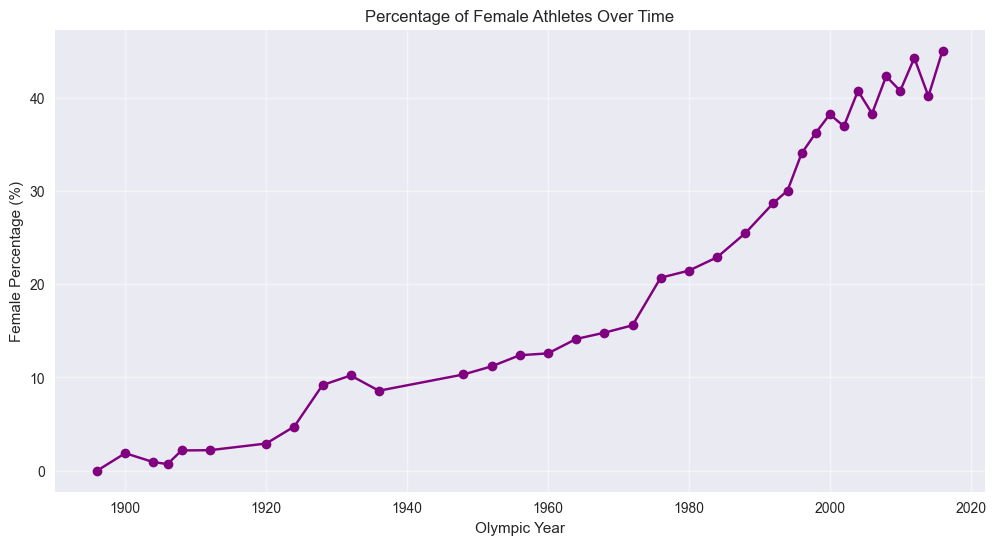

In [8]:
#Number of unique athletes by year and gender
gender_distribution = (
    data.groupby(["Year", "Sex"])["ID"]
    .nunique()
    .reset_index(name="Unique_Athletes")
)
gender_pivot = gender_distribution.pivot(index="Year", columns="Sex", values="Unique_Athletes").fillna(0)
gender_pivot["Female_Percentage"] = gender_pivot["F"] / (gender_pivot["F"] + gender_pivot["M"]) * 100
#print(gender_pivot) You can use this code to see the percentages
#Visualization
plt.figure(figsize=(12,6))
plt.plot(gender_pivot.index, gender_pivot["Female_Percentage"], marker="o", color="purple")
plt.title("Percentage of Female Athletes Over Time")
plt.xlabel("Olympic Year")
plt.ylabel("Female Percentage (%)")
plt.grid(True, alpha=0.5)
plt.show()

### Initial Comments
- No female participants were observed in 1896.
- The first female participation was observed in 1900, at 1.87%.
- In 1928, the rate rose to 9.18%.
- In 1976, the rate exceeded 20% for the first time.
- After 1990, it rose rapidly to 45%.
- After 2000, in the Winter Olympics, the rate shows a decreasing trend, while in the Summer Olympics, it shows an increasing trend.


In [9]:
#Summary Statistics
summary_stats = {
    "min_percentage": gender_pivot["Female_Percentage"].min(),
    "min_year": gender_pivot["Female_Percentage"].idxmin(),
    "max_percentage": gender_pivot["Female_Percentage"].max(),
    "max_year": gender_pivot["Female_Percentage"].idxmax(),
    "mean_percentage": gender_pivot["Female_Percentage"].mean(),
    "median_percentage": gender_pivot["Female_Percentage"].median()
}
print("Summary Statistics:")
for k,v in summary_stats.items():
    print(f"{k}: {v}")

Summary Statistics:
min_percentage: 0.0
min_year: 1896
max_percentage: 45.03086143662224
max_year: 2016
mean_percentage: 20.587727124411185
median_percentage: 15.587293770007388


- Min %: 0.0 (1896). 
- Max %: 45.03 (2016). 
- Median %: 15.58 
- Mean %: 20.58 
- Increase (1896–2016): 0% → 45% → a 45‑point rise over 120 years = an average annual increase of ~0.375 points. 
- However, this increase is not constant. Periods of acceleration and deceleration were observed. 

In [10]:
#Delta Analysis
gender_pivot["Delta"] = gender_pivot["Female_Percentage"].diff()
#Top Increases
top_increases = gender_pivot["Delta"].sort_values(ascending=False).head(5)
#Top Decreases
top_decreases = gender_pivot["Delta"].sort_values().head(5)
print("Fastest Increases:")
print(top_increases)
print("Largest decreases:")
print(top_decreases)

Fastest Increases:
Year
1976    5.107151
2016    4.885142
1928    4.441212
2008    3.996383
1996    3.982307
Name: Delta, dtype: float64
Largest decreases:
Year
2014   -4.106444
2006   -2.439368
1936   -1.635162
2010   -1.554845
2002   -1.275891
Name: Delta, dtype: float64


#### The years with the fastest growth
1924 - 1928: %4.74 to %9.18 = +4.4 points.  
1972 - 1976: %15.58 to %20.69 = +5.1 points.  
1988 - 1992: %25.46 to %28.70 = +3.2 points.  
1992 - 1996: %28.70 to %34.02 = +5.3 points.  
2000 - 2004: %38.20 to %40.73 = +2.5 points.  
2008 - 2012: %42.28 to %44.25 = +2 points.  
The most significant increases were recorded in 1928, 1976 and 1996.

In [11]:
#Piecewise Slope
periods = [(1896, 1928), (1928, 1972), (1972, 1992), (1992, 2016)]
slopes = {}
for start, end in periods:
    y_start = gender_pivot.loc[start, "Female_Percentage"]
    y_end = gender_pivot.loc[end, "Female_Percentage"]
    slope = (y_end - y_start) / (end - start)
    slopes[f"{start}-{end}"] = slope

print("\n Average Rates of Growth by Period (Points / Year):")
for period, slope in slopes.items():
    print(f"{period}: {slope:.3f}")


 Average Rates of Growth by Period (Points / Year):
1896-1928: 0.287
1928-1972: 0.146
1972-1992: 0.656
1992-2016: 0.680


1896–1928: Very low increase (0% to 9% = ~0.3 points).  
1928–1972: Slow increase (9% to 15% = 0.14 points).  
1972–1992: Moderate growth (15% to 28% = 0.65 points).  
1992–2016: Very rapid growth (28% to 45% = 0.7 points).

Participation increased rapidly after the 1970s. This is consistent with IOC policies.

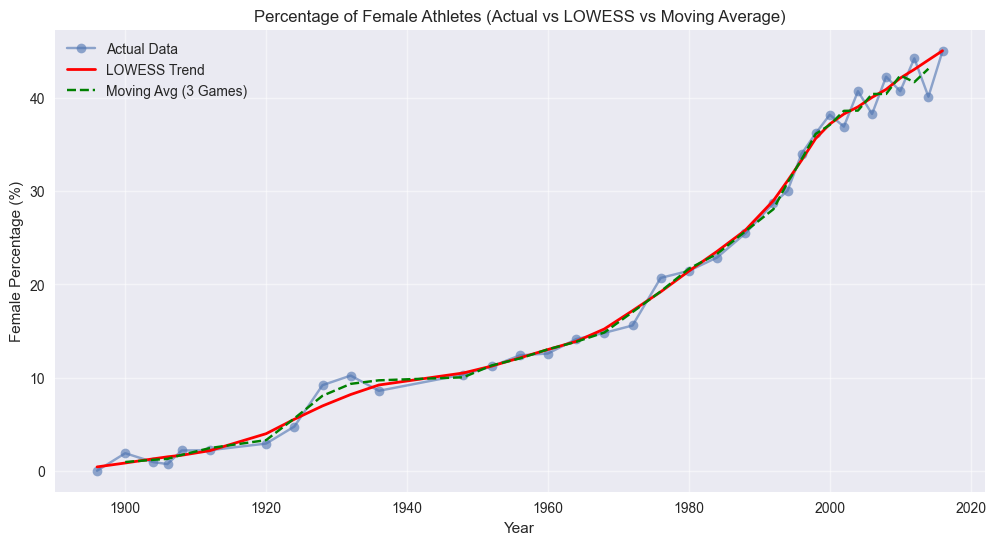

In [12]:
#LOWESS & Moving Average
years = gender_pivot.index.values
female_pct = gender_pivot["Female_Percentage"].values

# LOWESS smoothing
lowess_smoothed = lowess(female_pct, years, frac=0.2)  # frac = smoothing parameter

# Moving Average (For example, 4 years x 3 games = 12 years window)
gender_pivot["MA_3"] = gender_pivot["Female_Percentage"].rolling(window=3, center=True).mean()

# Graph
plt.figure(figsize=(12,6))
plt.plot(years, female_pct, marker="o", label="Actual Data", alpha=0.6)
plt.plot(lowess_smoothed[:,0], lowess_smoothed[:,1], color="red", label="LOWESS Trend", linewidth=2)
plt.plot(gender_pivot.index, gender_pivot["MA_3"], color="green", linestyle="--", label="Moving Avg (3 Games)")

plt.title("Percentage of Female Athletes (Actual vs LOWESS vs Moving Average)")
plt.xlabel("Year")
plt.ylabel("Female Percentage (%)")
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()    

#### LOWESS & Moving Average
This approach allows us to see short-term fluctuations (MA) and long-term trends (LOWESS) on the graph.  
After 2000, fluctuations of 38%, 42%, and 40% can be smoothed into a clearer trend.

__Result__: While the Female Athletes rate was 0% in 1896, it reached 45% in 2016. Especially after 1970, the slope rose to 0.7% points/year. The fastest increase occurred between 1992 and 1996 (+5.3 points). The LOWESS trend indicates a steady increase beyond the fluctuations.

## Subquestion 1.2: Which sports introduced female categories earliest, and which were the last?

In [13]:
female_first_year = (
    data[data["Sex"] == "F"]
    .groupby("Sport")["Year"]
    .min()
    .sort_values()
)
# Earliest 10
earliest_sports = female_first_year.head(10).reset_index()
earliest_sports.columns = ["Sport", "Year"]

# Latest 10
latest_sports = female_first_year.tail(10).reset_index()
latest_sports.columns = ["Sport", "Year"]

# Create summary table
summary_table = pd.DataFrame({
    "Earliest Sport": earliest_sports["Sport"],
    "Earliest Year": earliest_sports["Year"],
    "Latest Sport": latest_sports["Sport"].values,
    "Latest Year": latest_sports["Year"].values
})

print(summary_table)

   Earliest Sport  Earliest Year  Latest Sport  Latest Year
0         Croquet           1900    Water Polo         2000
1   Equestrianism           1900  Trampolining         2000
2            Golf           1900     Taekwondo         2000
3         Sailing           1900     Triathlon         2000
4          Tennis           1900     Bobsleigh         2002
5         Archery           1904      Skeleton         2002
6    Motorboating           1908     Wrestling         2004
7  Figure Skating           1908        Boxing         2012
8          Diving           1912   Ski Jumping         2014
9        Swimming           1912  Rugby Sevens         2016


Earliest Female Sports Category (1900–1912): Croquet, Equestrianism, Golf, Sailing, Tennis, Archery, Motorboating, Figure Skating, Diving, Swimming. These are mostly less physical contact sports.  
Latest Female Sports Category (2000–2016): Water Polo, Trampolining, Taekwondo, Triathlon, Bobsleigh, Skeleton, Wrestling, Boxing, Ski Jumping, Rugby Sevens. These are considered to be sports that involve more contact, power or risk.  
The inclusion of Rugby Sevens in 2016 underscores how recently significant strides have been made toward gender equality in sport.

### Subquestion 1.3: Which countries have sent the highest number of female athletes in Olympic history?

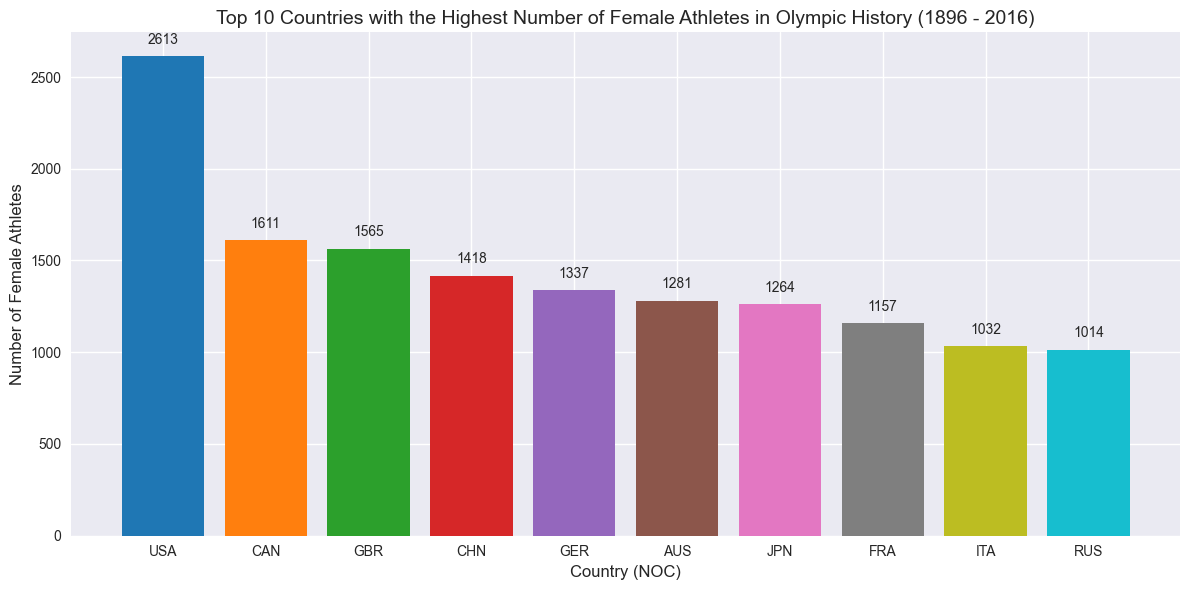

In [14]:
# Filter female athletes, count by country and select top 10
female_athletes = data[data["Sex"] == "F"]
female_counts = female_athletes.groupby("NOC")["ID"].nunique().sort_values(ascending=False)
top10_female_countries = female_counts.head(10)

# Graph
plt.figure(figsize=(12, 6))
colors = plt.cm.tab10(range(len(top10_female_countries))) #(tab10) for distinct colors
bars = plt.bar(top10_female_countries.index, 
               top10_female_countries.values, 
               color=colors)

plt.title("Top 10 Countries with the Highest Number of Female Athletes in Olympic History (1896 - 2016)", fontsize=14)
plt.xlabel("Country (NOC)", fontsize=12)
plt.ylabel("Number of Female Athletes", fontsize=12)
#numbers on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()

The graph shows that leadership in female athlete participation is concentrated in a few specific countries.  
These countries are generally countries with large populations and a long history in the Olympics.  
The USA has sent the most female athletes.  
This finding shows the impact of countries' sports policies, population size and economic development on women's participation in sports.

## Research Question 2: How do countries perform in the Olympic Games in terms of overall success, specialization in sports, and the impact of hosting?
### Subquestion 1: Which countries have the highest total medal counts?

In [15]:
# Only medal-winning rows (df)
df = data[data["Medal"].notna()].copy()
filtered_df = df[(df["NOC"] == "USA") & (df["Medal"] == "Gold")].sort_values(["Year", "Event"])
print(filtered_df)

    

            ID                            Name Sex   Age  Height  Weight  \
32333    16616       Thomas Edmund "Tom" Burke   M  21.0   183.0    66.0   
47375    24423      Thomas Pelham "Tom" Curtis   M  23.0   176.0    66.0   
32334    16616       Thomas Edmund "Tom" Burke   M  21.0   183.0    66.0   
76565    38860            Robert "Bob" Garrett   M  20.0   188.0    81.0   
42249    21795            Ellery Harding Clark   M  22.0   180.0     NaN   
...        ...                             ...  ..   ...     ...     ...   
170164   85507                   Kiley Neushul   F  23.0   173.0    65.0   
215737  108313               Melissa Seidemann   F  26.0   183.0   104.0   
228393  114708  Margaret Ann "Maggie" Steffens   F  23.0   173.0    74.0   
224160  112593           Kyle Frederick Snyder   M  20.0   180.0   102.0   
150122   75285           Helen Louise Maroulis   F  24.0   163.0    57.0   

                 Team  NOC        Games  Year  Season            City  \
32333   United

#### Introduction
To answer this subquestion, the historical Olympics dataset was examined(athlete_events.csv), focusing specifically on medal records. 
For validation, the number of gold medals won by the United States (USA) was first checked.
The above query returned 2,638 rows, which represents the count of all USA gold medal entries up to 2016.
However, this figure is much higher than the official records. This discrepancy indicated that the raw dataset inflates medal counts.
#### Sources of Discrepancy & Cleaning Steps
1. Team Sports Double-Counting 
- In team sports (e.g., basketball, football, hockey), every athlete in a winning team is recorded as an individual gold medalist. For instance, a basketball team with 12 players generates 12 gold entries in the dataset, although it should count as only one gold medal for the country.
To address this a deduplication algorithm has been applied.
Each medal was counted only once per (Games, Event, NOC, Medal) combination.
This ensured that a team gold medal in basketball, football, or other collective sports contributed one medal instead of multiple.
2. Mixed Teams (Historical “ZZX”)
- In early Olympic Games, some events were contested by mixed-nationality teams (e.g., sailing teams formed by athletes from different countries). In the dataset, these entries are recorded under the team name, but the NOC field still reflects individual countries, creating inconsistencies.
- The solution:
- Each NOC was cross-referenced with the official noc_regions.csv mapping.
- If a team’s name matched the country’s region, it was assigned directly to that country.
- If a team’s name was shared across multiple NOCs (e.g., “Foxhunters Hurlingham” appearing under both USA and GBR athletes), it was flagged as a Mixed Team.
- Mixed Team medals were reassigned under a special code: “ZZX”.
3. Standardization & Data Normalization
- String values (Team, NOC, Medal, etc.) were normalised to avoid inconsistencies caused by formatting.
- Consistency was ensured by standardising the medal categories to Gold, Silver and Bronze.

Top 10 (including ZZX mixed team bucket):
Medal      Gold  Silver  Bronze  Total
NOC_final                             
USA        1128     898     788   2814
URS         470     373     353   1196
GER         318     345     339   1002
GBR         284     316     305    905
FRA         262     278     328    868
ITA         256     225     241    722
CHN         239     184     172    595
RUS         202     183     199    584
SWE         199     214     242    655
GDR         192     165     162    519


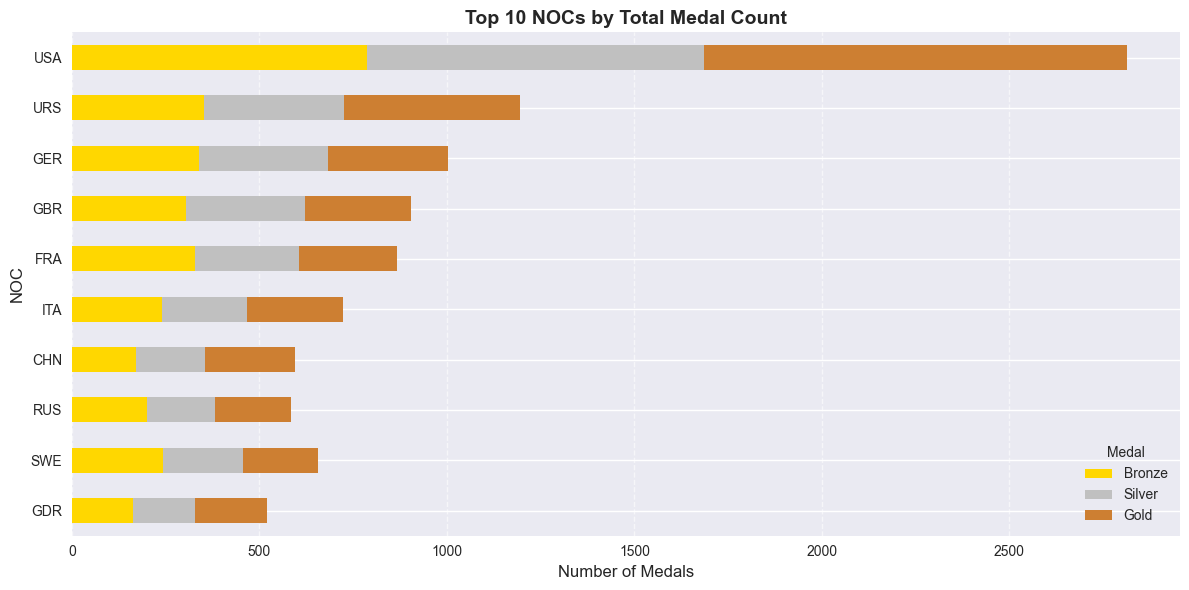

In [16]:
# Normalize strings
for c in ["Team", "NOC", "Medal", "Games", "Event", "Sport", "Season", "City"]:
    df[c] = df[c].astype(str).str.strip()

# Standardize medal values
df["Medal"] = df["Medal"].str.title().str.strip()  # Gold/Silver/Bronze

# =========================================================
# 1) DETECT MIXED TEAMS (ZZX)
#    Logic:
#      - If Team == region → not mixed.
#      - Else, if all rows with this Team belong to the same NOC
#        and matches current row’s NOC → not mixed.
#      - Otherwise → mixed team (ZZX).
# =========================================================

noc_map = (
    noc[["NOC", "region"]]
    .dropna(subset=["NOC", "region"])
    .drop_duplicates()
    .set_index("NOC")["region"]
)

df["team_norm"]   = df["Team"].fillna("").str.strip().str.lower()
df["region_norm"] = df["NOC"].map(noc_map).fillna("").str.strip().str.lower()

team_agg = (
    df.groupby("Team", dropna=False)["NOC"]
      .agg(team_noc_count="nunique", team_first_noc="first")
      .reset_index()
)

team_agg["team_single_noc"] = np.where(
    team_agg["team_noc_count"] == 1, team_agg["team_first_noc"], np.nan
)

df = df.merge(
    team_agg[["Team", "team_noc_count", "team_single_noc"]],
    on="Team",
    how="left"
)


# Condition 1: Team name equals region
team_matches_region = (df["team_norm"] != "") & (df["team_norm"] == df["region_norm"])

# Condition 2: Team only linked to one NOC, and matches row’s NOC
pure_same_noc = (df["team_noc_count"] == 1) & (df["team_single_noc"] == df["NOC"])

# Mixed flag
df["is_mixed"] = ~(team_matches_region | pure_same_noc)

# Assign ZZX for mixed teams
df["NOC_final"] = np.where(df["is_mixed"], "ZZX", df["NOC"])

# =========================================================
# 2) ONE MEDAL PER TEAM EVENT
#    Deduplicate by Games + Event + NOC_final + Medal
# =========================================================
dedup = df.drop_duplicates(subset=["Games", "Event", "NOC_final", "Medal"])

# =========================================================
# 3) MEDAL TABLE (Gold/Silver/Bronze)
# =========================================================
medal_table = (
    dedup.groupby(["NOC_final", "Medal"])
         .size()
         .unstack(fill_value=0)
)

for col in ["Gold", "Silver", "Bronze"]:
    if col not in medal_table.columns:
        medal_table[col] = 0

medal_table = medal_table[["Gold", "Silver", "Bronze"]]
medal_table["Total"] = medal_table.sum(axis=1)

# Sort: Gold > Silver > Bronze
medal_table = medal_table.sort_values(
    by=["Gold", "Silver", "Bronze"], ascending=False
)

print("Top 10 (including ZZX mixed team bucket):")
print(medal_table.head(10).to_string())

# =========================================================
# 4) EXPORT FUNCTION / For verification purposes
# =========================================================
def export_noc_medals(df, noc_code, medal_type, filename):
    subset = df[(df["NOC_final"] == noc_code) & (df["Medal"] == medal_type)]
    subset.to_csv(filename, index=False, encoding="utf-8")
    print(f"{noc_code} - {medal_type} saved to {filename}. {len(subset)} rows.")

# Example usage:
# export_noc_medals(dedup, "USA", "Gold", "usa_gold.csv")

# =========================================================
# 5) HORIZONTAL STACKED BAR CHART: TOP 10
# =========================================================

top10 = medal_table.head(10)

# Plot stacked horizontal bars (Bronze -> Silver -> Gold)
top10[["Bronze", "Silver", "Gold"]].plot(
    kind="barh",
    stacked=True,
    figsize=(12,6),
    color=["gold", "silver", "#cd7f32"]
)

plt.title("Top 10 NOCs by Total Medal Count", fontsize=14, weight="bold")
plt.xlabel("Number of Medals", fontsize=12)
plt.ylabel("NOC", fontsize=12)
plt.legend(title="Medal", loc="lower right", fontsize=10)
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

#### Result
- USA is by far the global leader with 2814 medals (1128 gold). This reflects long participation history.
- Soviet Union (URS), despite competing only between 1952–1991, accumulated 1196 medals, highlighting extraordinary efficiency in a relatively short span.
- Germany appears fragmented due to historical NOC variants (GER, GDR, FRG, SAA). If merged, Germany would be second overall.
- Note that; in this study, historical NOC codes (e.g., GER, FRG, GDR, SAA, EUA for Germany or URS, EUN, RUS, ROC for Russia) were not been merge into a single country entity. Instead, the default representation format provided in the data set has been used. This choice follows the official reporting practice.
- Great Britain (905 medals), France (868) have maintained strong and consistent performances over the entire history of the Games.

### Subquestion 2) In which sports do the top medal-winning countries particularly excel?

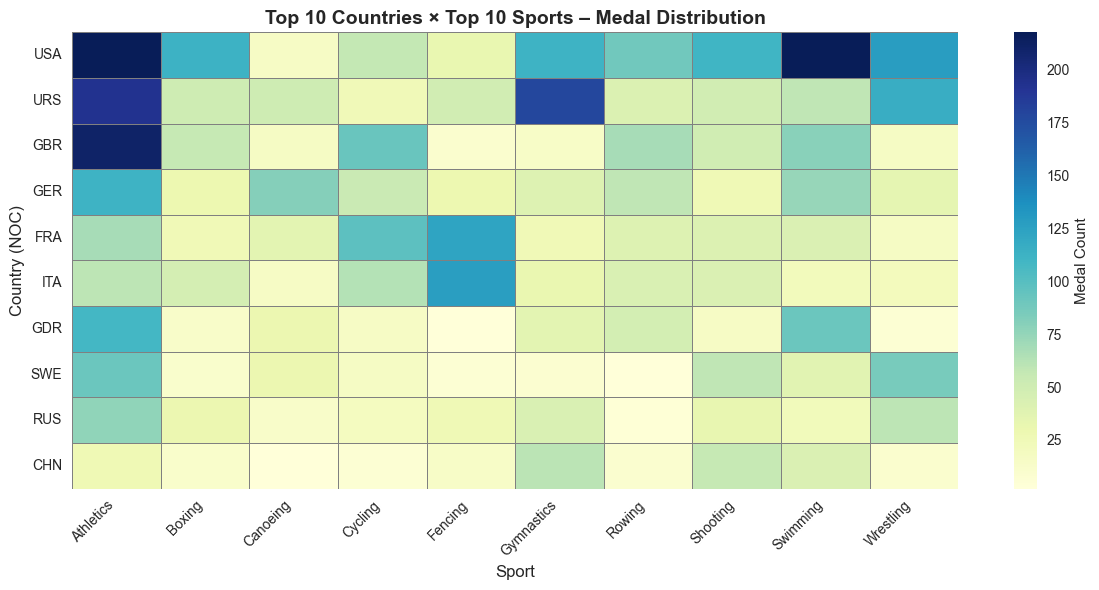

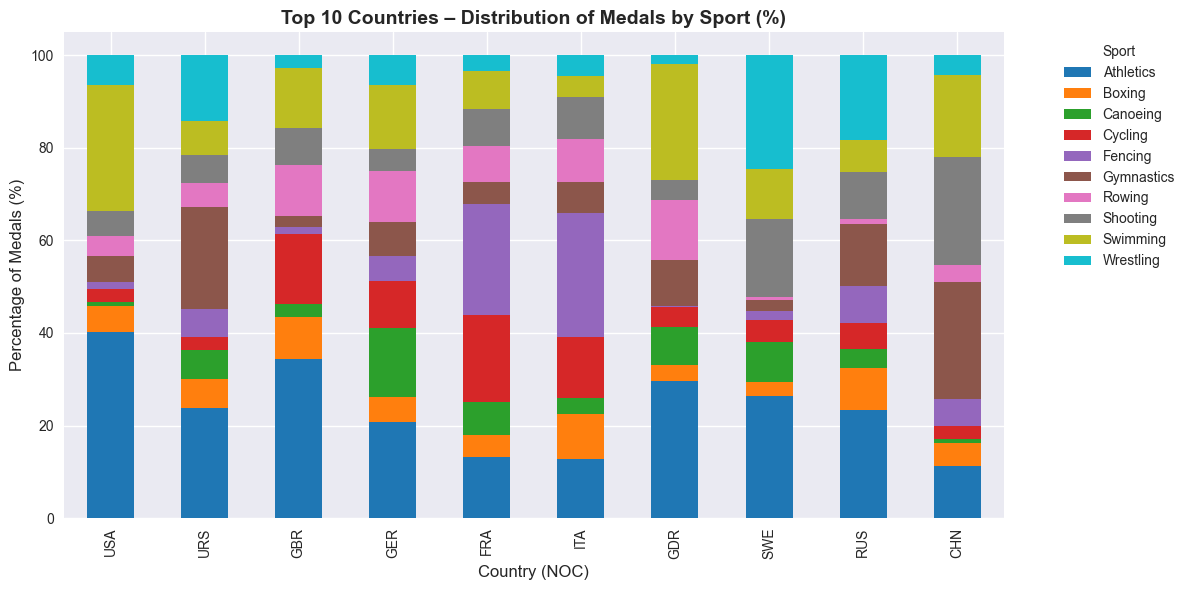

In [17]:
medals_by_country_sport = (
    dedup.groupby(["NOC_final", "Sport"])["Medal"]
         .count()
         .reset_index(name="Medal_Count")
)

top_countries = (
    medals_by_country_sport.groupby("NOC_final")["Medal_Count"]
    .sum()
    .nlargest(10)
    .index
)

top_sports = (
    medals_by_country_sport.groupby("Sport")["Medal_Count"]
    .sum()
    .nlargest(10)
    .index
)

filtered = medals_by_country_sport[
    medals_by_country_sport["NOC_final"].isin(top_countries)
    & medals_by_country_sport["Sport"].isin(top_sports)
]

pivot = filtered.pivot(index="NOC_final", columns="Sport", values="Medal_Count").fillna(0)

# Graph 1 - Heatmap
# Rows are ordered by total medals
row_order = pivot.sum(axis=1).sort_values(ascending=False).index
pivot_sorted = pivot.loc[row_order]

plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot_sorted,
    cmap="YlGnBu",
    linewidths=.5,
    linecolor="gray",
    cbar_kws={"label": "Medal Count"},
    robust=True,
    annot=False
)

plt.title("Top 10 Countries × Top 10 Sports – Medal Distribution", fontsize=14, weight="bold")
plt.xlabel("Sport", fontsize=12)
plt.ylabel("Country (NOC)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#Grap 2 - Stacked Bar Chart
pivot_pct = pivot_sorted.div(pivot_sorted.sum(axis=1), axis=0) * 100

pivot_pct.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    colormap="tab10"
)

plt.title("Top 10 Countries – Distribution of Medals by Sport (%)", fontsize=14, weight="bold")
plt.xlabel("Country (NOC)", fontsize=12)
plt.ylabel("Percentage of Medals (%)", fontsize=12)
plt.legend(title="Sport", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

#### Heatmap Analysis
The heatmap clearly demonstrates the absolute concentration of medals across sports and nations. Rows were ordered by total medals, allowing direct comparison of which countries are structurally dominant.
- USA: Strong dominance in Athletics and Swimming, both historically medal-rich sports. USA’s wide spread across multiple sports signals not only depth but also breadth of talent.
- URS (Soviet Union): Show consistent strength in Gymnastics, Athletics and Wrestling, indicating a long-term tradition in these disciplines.
- GBR (Great Britain): Excellence in Rowing and Cycling is evident, aligning with long-standing traditions and infrastructure.
- GER (Germany): Balanced performance, with noticeable strengths in Canoeing and Rowing. Germany’s medal distribution appears less skewed than other countries.
- FRA (France): Strong emphasis on Fencing and Cycling, which are historically French-dominated disciplines.
- ITA (Italy): High medal intensity in Fencing and Cycling, but also competitive in Rowing, showing specialization in technical endurance sports.
- GDR (East Germany): Strong focus on Swimming and Athletics, consistent with state-driven sports science and performance enhancement programs of the Cold War era.
- SWE (Sweden): Notable results in Wrestling and Rowing, but overall medal volume is smaller compared to other top 10 nations.
- RUS (Russia): Visible concentration in Wrestling and Gymnastics, with secondary contributions from Athletics.
- CHN (China): Specialized in a narrower field, particularly strong in Gymnastics.

#### Stacked Bar Chart Analysis
The stacked bar chart highlights relative distribution (percentages) rather than absolute dominance, offering deeper insight into specialization.
- USA: Very diversified, but still with an overwhelming share of medals in Athletics and Swimming. Clear dual-core specialization.
- URS: Almost one-third of medals from Gymnastics, underscoring cultural and institutional prioritization.
- GBR: Over 40% of medals in Rowing and Cycling, confirming Britain’s reputation as a powerhouse in endurance and water-based sports.
- GER: More evenly distributed than GBR, but canoeing and rowing combined form the majority of Germany’s medal portfolio.
- FRA: Over half of medals are from Fencing and Cycling, showing narrow but intense specialization.
- ITA: Nearly 50% of medals from Fencing and Cycling as well, a pattern similar to France, reinforcing a Mediterranean specialization cluster.
- GDR: Extremely skewed—Swimming and Athletics account for more than 60% of their medal share, consistent with known systemic focus areas.
- SWE: Highly concentrated in Wrestling, with relatively minor shares elsewhere.
- RUS: Dominated by Wrestling and Gymnastics, suggesting reliance on combat and technical sports.
- CHN: Gymnastics is the largest slice, showing China’s targeted success in precision-based sports at the time.

### Subquestion 3: Do host countries win more medals when hosting?

Wilcoxon test: 0.0 7.450580596923828e-09


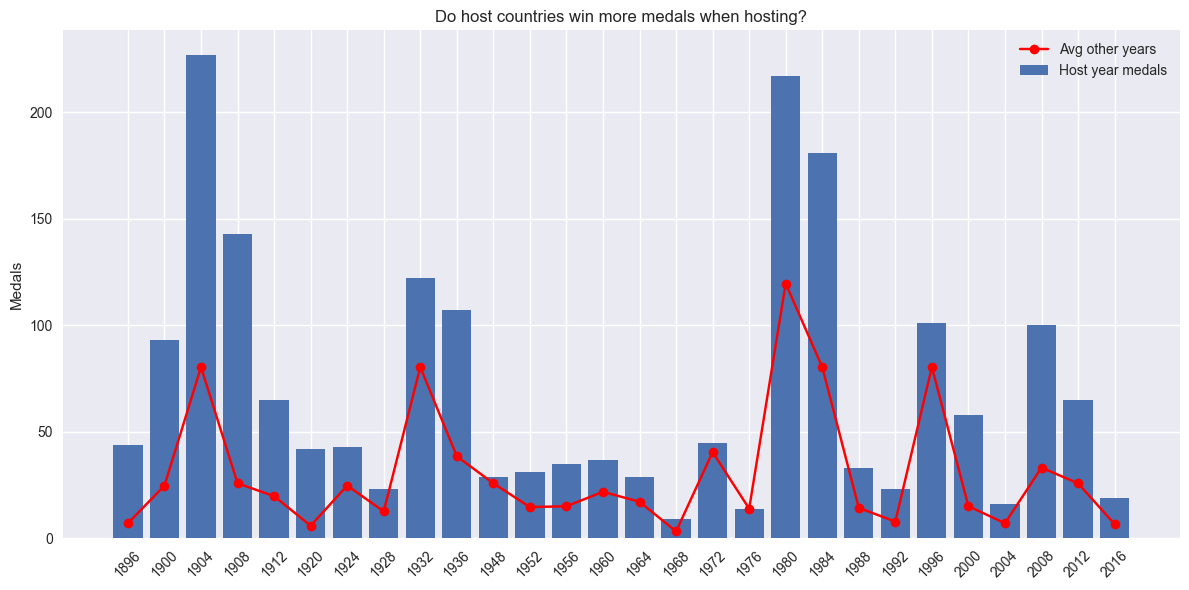

In [18]:
from scipy import stats

# noc_regions.csv edit
noc.loc[noc["NOC"] == "GBR", "region"] = "Great Britain"
noc.loc[noc["NOC"] == "FRG", "region"] = "West Germany"
noc.loc[noc["NOC"] == "SAA", "region"] = "Saar"
noc.loc[noc["NOC"] == "GDR", "region"] = "East Germany"
noc.loc[noc["NOC"] == "URS", "region"] = "Soviet Union"
noc.loc[noc["NOC"] == "EUN", "region"] = "Unified Team"

# Host city -> Host country mapping
hosts = {
    1896: "Greece", 1900: "France", 1904: "USA", 1908: "Great Britain",
    1912: "Sweden", 1920: "Belgium", 1924: "France", 1928: "Netherlands",
    1932: "USA", 1936: "Germany", 1948: "Great Britain", 1952: "Finland",
    1956: "Australia", 1960: "Italy", 1964: "Japan", 1968: "Mexico",
    1972: "West Germany", 1976: "Canada", 1980: "Soviet Union", 1984: "USA",
    1988: "South Korea", 1992: "Spain", 1996: "USA", 2000: "Australia",
    2004: "Greece", 2008: "China", 2012: "Great Britain", 2016: "Brazil"
}
medal_table = (
    dedup.groupby(["Year", "NOC_final"]) 
         .size()
         .reset_index(name="medal_count")
)
noc_map = noc.set_index("NOC")["region"].to_dict()
medal_table["country"] = medal_table["NOC_final"].map(noc_map)
medal_table["is_host"] = medal_table.apply(
    lambda r: (hosts.get(r["Year"], None) == r["country"]), axis=1
)
# Host performance
host_perf = medal_table[medal_table["is_host"]]

country_avg = (
    medal_table.groupby("country")["medal_count"]
               .mean()
               .reset_index(name="avg_medals_other")
)

host_perf = host_perf.merge(country_avg, on="country", how="left")
host_perf["diff"] = host_perf["medal_count"] - host_perf["avg_medals_other"]

# Wilcoxon
stat, pval = stats.wilcoxon(host_perf["medal_count"], host_perf["avg_medals_other"])
print("Wilcoxon test:", stat, pval)

# Graph
plt.figure(figsize=(12,6))
plt.bar(host_perf["Year"].astype(str), host_perf["medal_count"], label="Host year medals")
plt.plot(host_perf["Year"].astype(str), host_perf["avg_medals_other"],
         color="red", marker="o", label="Avg other years")
plt.xticks(rotation=45)
plt.ylabel("Medals")
plt.title("Do host countries win more medals when hosting?")
plt.legend()
plt.tight_layout()
plt.show()

- The number of medals won by host countries during the hosting years and their averages in other years have been compared.
- The Wilcoxon test was used to determine whether the difference was statistically significant.
- The performance difference between the years of home ownership is visualised in the graph.

p = 7.45e-09 = 0.00000000745. 

Hypothesis Testing Framework:
H0 (null): There is no significant difference between the number of medals host countries win in hosting years versus other years.
H1 (alternative): Host countries win more medals in the years they host the Olympics.

With p < 0.000001, we can reject H0 with more than 99.999% confidence.

Interpretation:
- Host countries, compared to their own historical performance, win significantly more medals in the years they host the Olympics. This effect is statistically very strong and is extremely unlikely to have occurred by random chance alone.
